<h1>Feature Engineering and Extration</h1>

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer


<h3>Loading the Data</h3>

In [30]:
# Loading the dataset into the notebook
data = pd.read_csv('../data/articles_clean.csv')
data.head()

,Unnamed: 0,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,published_date_cleaned,data_channel_cleaned
0,0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5,3,1,4.579592,5,...,1833.333,0.403762,0.038762,0.036735,0.024490,0.25,0.25,1600,2014-03-31,business
1,1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4,1,0,4.636704,7,...,8500.000,0.410707,0.180934,0.044944,0.003745,0.00,0.00,1500,2014-04-01,tech
2,2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8,1,0,4.627451,7,...,2076.333,0.397545,0.044864,0.035294,0.019608,0.00,0.00,1400,2014-04-01,tech
3,3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4,1,0,5.083665,9,...,2200.000,0.491578,0.157620,0.047809,0.011952,0.00,0.00,1300,2014-04-01,tech
4,4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6,9,0,4.336022,7,...,805.000,0.628535,0.078497,0.053763,0.034946,0.00,0.00,3000,2014-04-01,misc


In [31]:
df = data

In [32]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

<h3>Treating Outliers</h3>

In [33]:
# making a list of all numeric columns in the dataset
num_columns = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'title_subjectivity', 'shares']

In [34]:
# Removing outliers by deleting all data outside the first 95% of the data
def remove_outliers(df, col):
    lower = df[col].min()
    higher = df[col].quantile(.95)
    df[col] = df[col].clip(lower=lower, upper=higher)
    return df[col]

print(df.describe())

for i in num_columns:
    remove_outliers(df, i)

df.describe()



         article_id  unique_tokens_rate    num_hrefs     num_imgs  \
count  1.003000e+03         1003.000000  1003.000000  1003.000000   
mean   6.915159e+06            0.526890    11.720837     5.188435   
std    4.823885e+05            0.118793    15.181597     8.495002   
min    2.195051e+06            0.000000     0.000000     0.000000   
25%    7.006102e+06            0.466751     4.000000     1.000000   
50%    7.013065e+06            0.533118     8.000000     2.000000   
75%    7.027570e+06            0.596615    14.000000     7.000000   
max    7.041291e+06            0.867925   162.000000    84.000000   

        num_videos  average_token_length  num_keywords  min_avg_key  \
count  1003.000000           1003.000000   1003.000000  1003.000000   
mean      1.215354              4.603757      7.206381  1131.437972   
std       4.079730              0.701756      1.856713  1181.134621   
min       0.000000              0.000000      2.000000     0.000000   
25%       0.000000     

,article_id,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,max_avg_key,avg_avg_key,href_avg_shares,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares
count,1.003000e+03,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,6.915159e+06,0.524354,10.395813,4.580259,0.634098,4.592637,7.206381,1121.769655,5546.328503,3253.750034,7070.637844,0.443956,0.103971,0.037661,0.017285,0.292537,0.057536,2801.232303
std,4.823885e+05,0.114301,8.264578,5.885661,1.052852,0.687086,1.856713,1162.286160,2351.984209,1039.975808,11158.376049,0.103480,0.087489,0.014419,0.009043,0.325227,0.266609,2956.119061
min,2.195051e+06,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3568.870000,1360.101000,0.000000,0.000000,-0.300000,0.000000,0.000000,0.000000,-1.000000,58.000000
25%,7.006102e+06,0.466751,4.000000,1.000000,0.000000,4.490363,6.000000,0.000000,3613.040000,2533.297000,1300.000000,0.395575,0.051911,0.028655,0.011224,0.000000,0.000000,1000.000000
50%,7.013065e+06,0.533118,8.000000,2.000000,0.000000,4.685484,7.000000,984.066700,4635.807000,3004.755000,2766.667000,0.455990,0.102579,0.037325,0.016266,0.200000,0.000000,1600.000000
75%,7.027570e+06,0.596615,14.000000,7.000000,1.000000,4.855388,9.000000,2116.714500,6561.910000,3809.005000,7341.000000,0.509508,0.163183,0.046922,0.022597,0.500000,0.150000,3100.000000
max,7.041291e+06,0.687783,33.000000,21.000000,4.000000,5.125162,10.000000,3264.605000,11800.000000,5638.779700,45940.000000,0.598904,0.259083,0.064156,0.036680,1.000000,1.000000,12290.000000


array([[<AxesSubplot:title={'center':'unique_tokens_rate'}>,
        <AxesSubplot:title={'center':'num_hrefs'}>,
        <AxesSubplot:title={'center':'num_imgs'}>,
        <AxesSubplot:title={'center':'num_videos'}>],
       [<AxesSubplot:title={'center':'average_token_length'}>,
        <AxesSubplot:title={'center':'num_keywords'}>,
        <AxesSubplot:title={'center':'min_avg_key'}>,
        <AxesSubplot:title={'center':'max_avg_key'}>],
       [<AxesSubplot:title={'center':'avg_avg_key'}>,
        <AxesSubplot:title={'center':'href_avg_shares'}>,
        <AxesSubplot:title={'center':'global_subjectivity'}>,
        <AxesSubplot:title={'center':'global_sentiment_polarity'}>],
       [<AxesSubplot:title={'center':'global_rate_positive_words'}>,
        <AxesSubplot:title={'center':'global_rate_negative_words'}>,
        <AxesSubplot:title={'center':'title_subjectivity'}>,
        <AxesSubplot:>]], dtype=object)

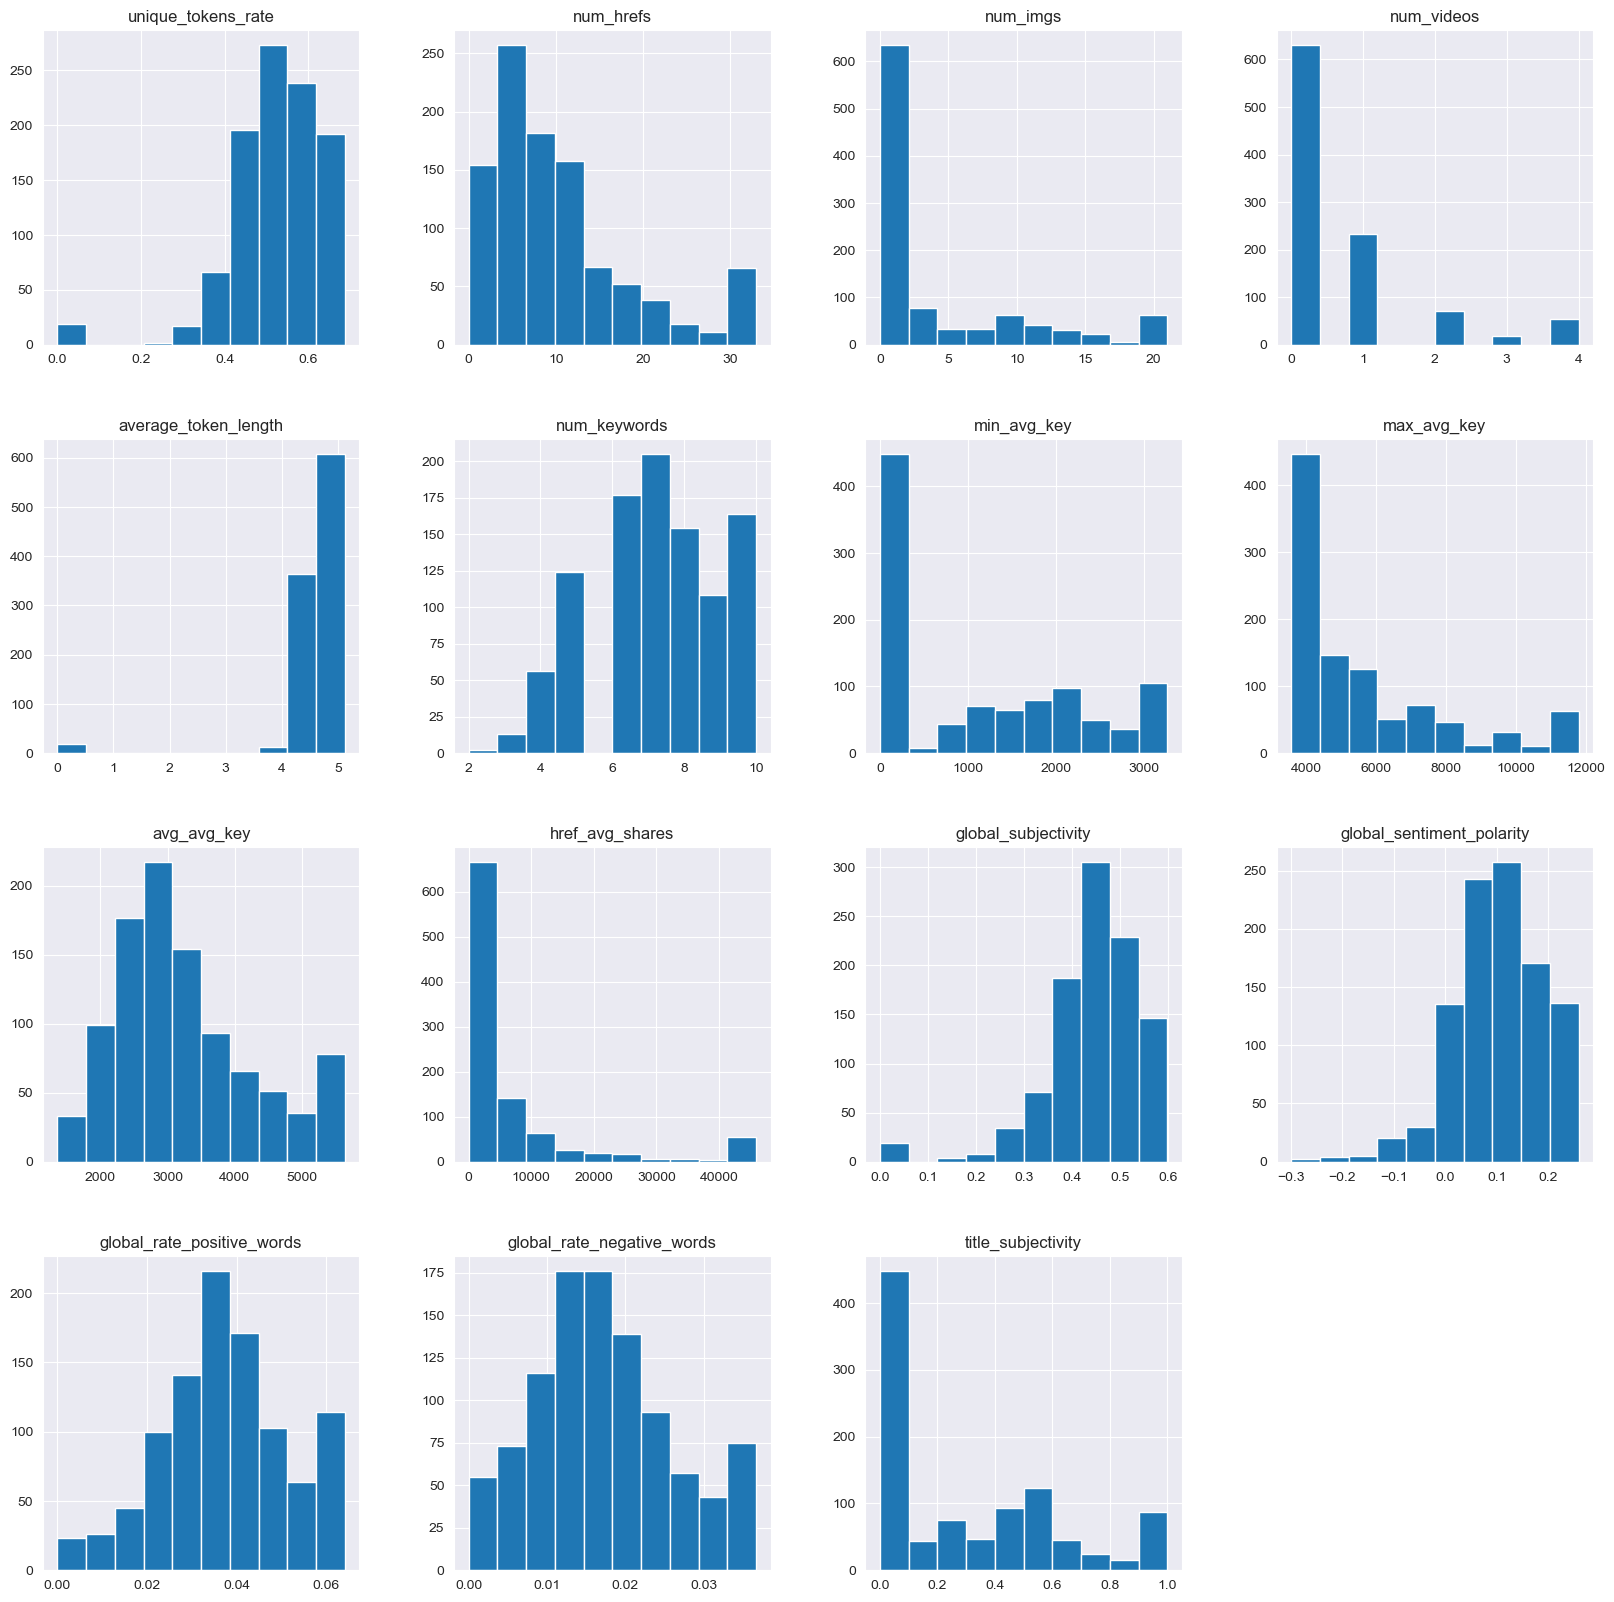

In [35]:
# Making a histogram of all numeric columns in the dataset
fields = ['unique_tokens_rate', 'num_hrefs', 'num_imgs', 'num_videos', 'average_token_length', 'num_keywords', 'min_avg_key', 'max_avg_key', 'avg_avg_key', 'href_avg_shares', 'global_subjectivity', 'global_sentiment_polarity', 'global_rate_positive_words', 'global_rate_negative_words', 'title_subjectivity']
df.hist(fields, figsize=(20,20))

<AxesSubplot:>

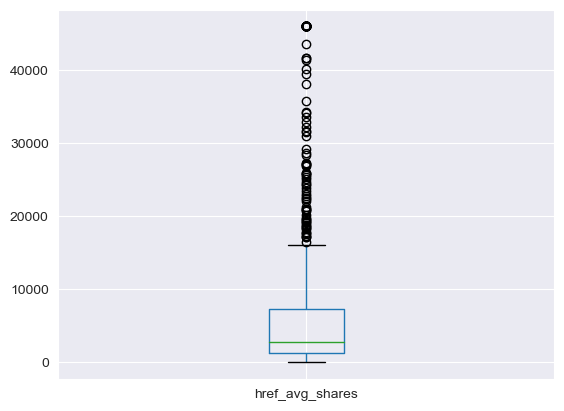

In [36]:
df[['href_avg_shares']].boxplot()

<AxesSubplot:>

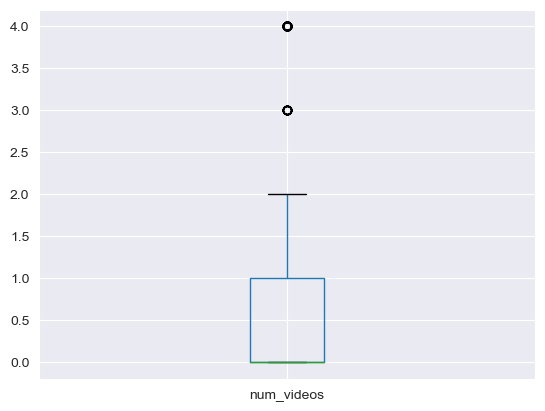

In [37]:
df[['num_videos']].boxplot()

<AxesSubplot:>

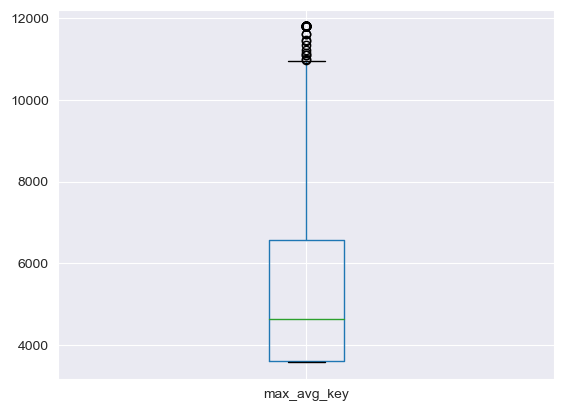

In [38]:
df[['max_avg_key']].boxplot()

<AxesSubplot:>

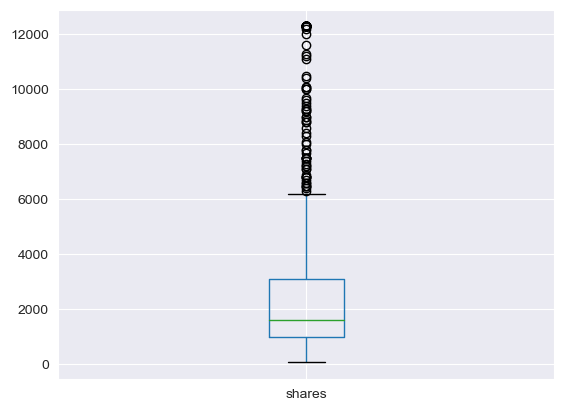

In [39]:
df[['shares']].boxplot()

<h3>Feature Engineering</h3>

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1003 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   article_id                  1003 non-null   int64  
 1   title                       1003 non-null   object 
 2   text                        1003 non-null   object 
 3   unique_tokens_rate          1003 non-null   float64
 4   num_hrefs                   1003 non-null   float64
 5   num_imgs                    1003 non-null   float64
 6   num_videos                  1003 non-null   float64
 7   average_token_length        1003 non-null   float64
 8   num_keywords                1003 non-null   int64  
 9   min_avg_key                 1003 non-null   float64
 10  max_avg_key                 1003 non-null   float64
 11  avg_avg_key                 1003 non-null   float64
 12  href_avg_shares             1003 non-null   float64
 13  global_subjectivity         1003 

In [51]:
df.replace('business', df[df['data_channel_cleaned'] == 'business']['shares'].mean())['data_channel_cleaned']

0         2599.768293
1                tech
2                tech
3                tech
4                misc
            ...      
998       2599.768293
999              tech
1000    entertainment
1001      2599.768293
1002      2599.768293
Name: data_channel_cleaned, Length: 1003, dtype: object

In [62]:
df.replace({'business':df[df['data_channel_cleaned'] == 'business']['shares'].mean()})['data_channel_cleaned']

0         2599.768293
1                tech
2                tech
3                tech
4                misc
            ...      
998       2599.768293
999              tech
1000    entertainment
1001      2599.768293
1002      2599.768293
Name: data_channel_cleaned, Length: 1003, dtype: object

In [68]:
means = []
values = df['data_channel_cleaned'].unique()
df['channel_averages'] = df['data_channel_cleaned']
for i in values:
    df['channel_averages'].replace({i:df[df['data_channel_cleaned'] == i]['shares'].mean()}, inplace = True)

0         2599.768293
1                tech
2                tech
3                tech
4                misc
            ...      
998       2599.768293
999              tech
1000    entertainment
1001      2599.768293
1002      2599.768293
Name: channel_averages, Length: 1003, dtype: object
0         2599.768293
1         3110.914141
2         3110.914141
3         3110.914141
4                misc
            ...      
998       2599.768293
999       3110.914141
1000    entertainment
1001      2599.768293
1002      2599.768293
Name: channel_averages, Length: 1003, dtype: object
0         2599.768293
1         3110.914141
2         3110.914141
3         3110.914141
4         2643.302857
            ...      
998       2599.768293
999       3110.914141
1000    entertainment
1001      2599.768293
1002      2599.768293
Name: channel_averages, Length: 1003, dtype: object
0         2599.768293
1         3110.914141
2         3110.914141
3         3110.914141
4         2643.302857
        

In [69]:
df

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,title_subjectivity,title_sentiment_polarity,shares,published_date_cleaned,data_channel_cleaned,channel_averages
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,0.403762,0.038762,0.036735,0.024490,0.250000,0.250000,1600,2014-03-31,business,2599.768293
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,0.410707,0.180934,0.044944,0.003745,0.000000,0.000000,1500,2014-04-01,tech,3110.914141
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,0.397545,0.044864,0.035294,0.019608,0.000000,0.000000,1400,2014-04-01,tech,3110.914141
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,0.491578,0.157620,0.047809,0.011952,0.000000,0.000000,1300,2014-04-01,tech,3110.914141
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,0.598904,0.078497,0.053763,0.034946,0.000000,0.000000,3000,2014-04-01,misc,2643.302857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,0.493519,-0.119440,0.005376,0.021505,0.000000,0.000000,1300,2014-04-17,business,2599.768293
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,0.455042,0.191196,0.053731,0.011940,0.000000,0.000000,1100,2014-04-17,tech,3110.914141
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,0.522917,0.009809,0.025381,0.036680,0.600000,-0.600000,4400,2014-04-17,entertainment,2705.389189
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,0.494445,0.144969,0.064156,0.020388,0.833333,0.433333,1900,2014-04-17,business,2599.768293


In [70]:
# Creating a function for determining whether the publishing date is a weekday or weekend
def is_weekday(date):
    if date in [5,6]:
        return 0;
    elif date in [0,1,2,3,4]:
        return 1;
    else:
        return 'Error'


In [71]:
# Creating a function that determines number of words in a given text

def no_of_words(text):
    count=1
    for i in text:
        if i == ' ':
            count = count + 1

    return count;



In [72]:
def addFeatures(df):
    # Adding Feature for whether the publication date was a week day
    list = []
    for i in df['published_date_cleaned']:
        list.append(is_weekday(pd.to_datetime(i).day_of_week))
    df = pd.concat([df, pd.DataFrame(list, columns=['is_weekday'])], axis=1)

    # Adding field for number of tokens in the Title
    list = []
    for i in df['title']:
        list.append(no_of_words(i))
    df = pd.concat([df, pd.DataFrame(list, columns=['title_nom_tokens'])], axis=1)


# Adding field for number of tokens in the Article
    list = []
    for i in df['text']:
        list.append(no_of_words(i))
    df= pd.concat([df, pd.DataFrame(list, columns=['text_nom_tokens'])], axis=1)

    return df



In [73]:
df = addFeatures(df)

<h3>Feature Extraction</h3>

In [74]:
!pip install wordcloud

In [75]:
!pip install nltk

In [76]:
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ituser\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [77]:
# Function for Data Preprocessing by removing numbers, symbols, and stopwords
REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

def preprocess(text):
    text = text.replace("\d+"," ") # removing numbers
    text = re.sub(r"(?:\@|https?\://)\S+", "", text)#removes @ and links
    text = text.lower() #lowercase
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    new_text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    new_text = new_text.strip()
    return new_text

In [78]:
STOPWORDS_nlp

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [79]:
STOPWORDS_nlp.update(['would', 'should', 'could', 'also', 'even', 'though', 'every', 'everyone', 'else', 'feel', 'like', 'go', 'back', 'still', 'thing', 'another', 'might', 'come', 'want', 'used', 'take', 'way', 'said', 'made', 'well', 'day', 'know', 'going', 'use', 'really', 'three', 'two', 'make', 'may', 'right', 'next', 'using', 'many', 'part', 'new', 'see', 'lot', 'need', 'including', 'seealso', 'look', 'show', 'group', 'last', 'much', 'end', 'set', 'never', 'number', 'long', 'something', 'say', 'open', 'one', 'time', 'around', 'later', 'include', 'told', 'says', 'window', 'opens', 'yes', 'year', 'years'])

In [80]:
# Applying the data preprocessing function
df['text_prepared'] = df['text'].astype(str).apply(preprocess)
df['text_prepared'].head()

0    reported week yahoo getting online video busin...
1    april fools marks pranking goes corporate form...
2    world series champion boston red sox visited w...
3    less week apple pledged emoticons racially div...
4    android users soon series features devices cam...
Name: text_prepared, dtype: object

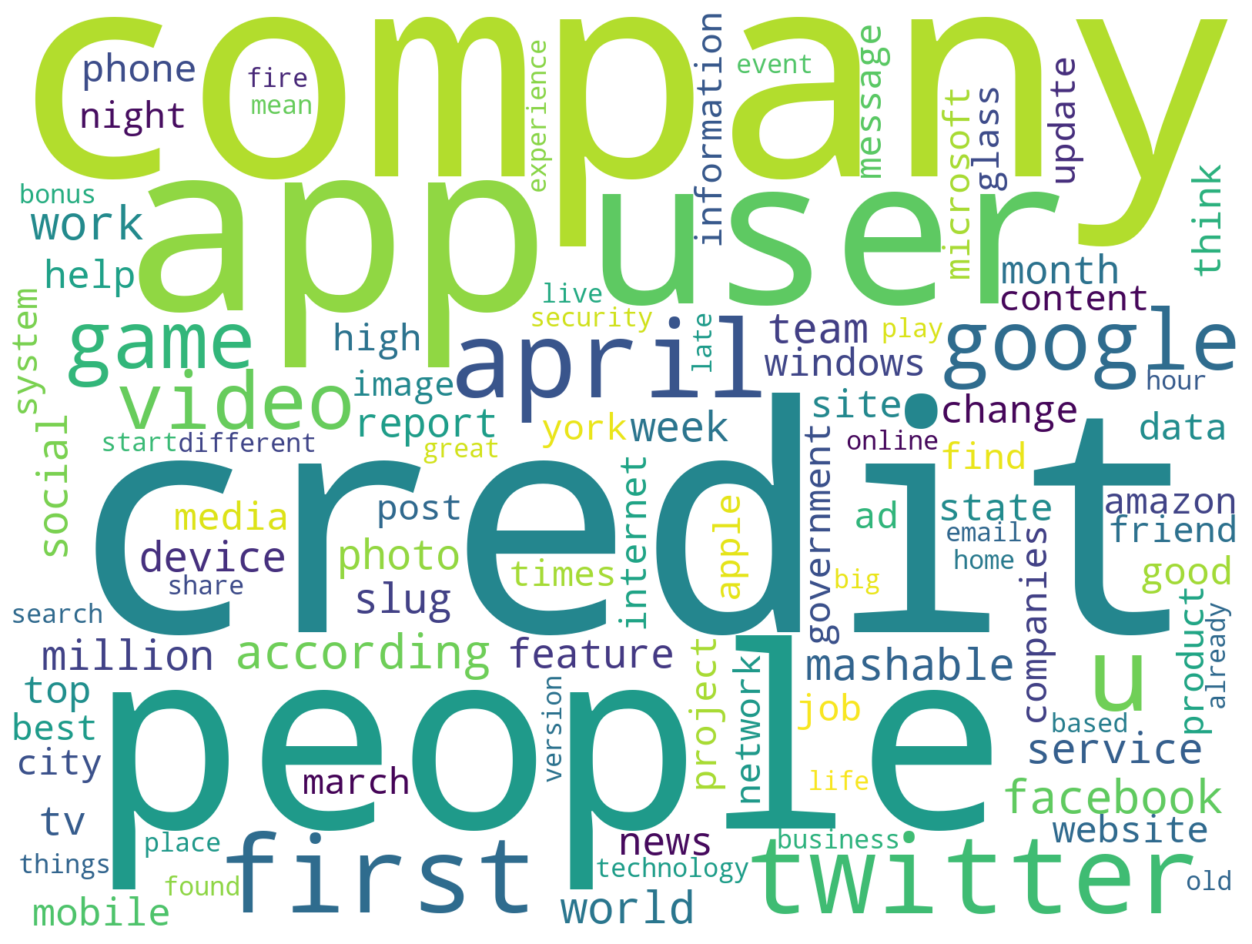

In [81]:
# Making a wordcloud of the text in the article
all_text = " ".join(sent for sent in df['text_prepared'])
wordcloud = WordCloud(background_color = "white", height=1200, width= 1600, collocations=False , max_words= 100).generate(all_text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [82]:
# Counting Parts of Speech (POS)
from collections import Counter

def pos_counter(x,pos):
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

In [83]:
df['Noun_Counts'] = df['text_prepared'].apply(lambda x: pos_counter(x,'NN'))
df['Verb_Counts'] = df['text_prepared'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB')))
df['Adjective_Counts'] = df['text_prepared'].apply(lambda x: pos_counter(x,'JJ'))

In [84]:
df

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,published_date_cleaned,data_channel_cleaned,channel_averages,is_weekday,title_nom_tokens,text_nom_tokens,text_prepared,Noun_Counts,Verb_Counts,Adjective_Counts
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,2014-03-31,business,2599.768293,1,6,167,reported week yahoo getting online video busin...,41,2,16
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,2014-04-01,tech,3110.914141,1,10,76,april fools marks pranking goes corporate form...,16,2,12
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,2014-04-01,tech,3110.914141,1,14,368,world series champion boston red sox visited w...,76,13,41
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,2014-04-01,tech,3110.914141,1,6,224,less week apple pledged emoticons racially div...,51,8,19
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,2014-04-01,misc,2643.302857,1,9,235,android users soon series features devices cam...,39,8,26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,2014-04-17,business,2599.768293,1,12,94,let cut chase apps bells whistles refreshing s...,14,3,11
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,2014-04-17,tech,3110.914141,1,9,199,taylor swift bridal showers pastels baked good...,51,3,16
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,2014-04-17,entertainment,2705.389189,1,13,137,seen big movies throw big google hangouts amaz...,29,4,15
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,2014-04-17,business,2599.768293,1,7,761,pixar art directors robert kondo dice tsutsumi...,146,12,72


In [85]:
def vectorize(data, vectorizer):
    cv_object = vectorizer.fit(data['text_prepared'])
    X = cv_object.transform(data['text_prepared'])
    print(cv_object.get_feature_names_out())
    print(len(cv_object.get_feature_names_out()))
    df_features = pd.DataFrame(X.toarray(),columns=cv_object.get_feature_names_out())
    data = pd.concat([data.reset_index(drop=True),df_features.reset_index(drop=True)],axis=1)
    return data

In [86]:
cv_2_200 = vectorize(df, CountVectorizer(ngram_range=(2,2),max_features=200))

['according report' 'air force' 'air quality' 'airlines flight'
 'al jazeera' 'allows users' 'amazon fire' 'android app'
 'announced thursday' 'app store' 'apple tv' 'april credit' 'april et'
 'april fools' 'associated press' 'available ios' 'background check'
 'black box' 'black boxes' 'blog post' 'boston globe' 'boston marathon'
 'bros legendary' 'business school' 'carbon dioxide' 'center opened'
 'change password' 'change passwords' 'christina ascani' 'climate change'
 'co founder' 'colbert report' 'comedy central' 'company announced'
 'copenhagen zoo' 'course sampling' 'credit facebook' 'credit google'
 'credit mashable' 'credit microsoft' 'credit screenshot' 'daily news'
 'david letterman' 'david ortiz' 'degrees fahrenheit' 'domain name'
 'earlier week' 'easter eggs' 'eastern ukraine' 'el ni' 'empire state'
 'entrepreneurship center' 'facebook messenger' 'facebook page'
 'facebook twitter' 'final four' 'finish line' 'fire tv' 'first step'
 'ford mustang' 'fort hood' 'friends famil

In [87]:
cv_2_200

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,windows phone,windows update,windows xp,world cup,wp_scm_comment bonus,wrote blog,york city,york times,youtube channel,youtube videos
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,0,0,0,0,0,0,0,0,0,1
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,0,0,0,0,0,0,0,0,0,0
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,0,0,0,0,0,0,0,0,0,0
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,0,0,0,0,1,0,0,0,0,0
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,0,0,0,0,0,0,0,0,0,0
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,0,0,0,0,0,0,0,0,0,0
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,0,0,0,0,0,0,0,0,0,0
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,0,0,0,0,0,0,0,0,0,0


In [88]:
tfidf_2_200 = vectorize(df, TfidfVectorizer(ngram_range=(2,2),max_features=200))

['according report' 'air force' 'air quality' 'airlines flight'
 'al jazeera' 'allows users' 'amazon fire' 'android app'
 'announced thursday' 'app store' 'apple tv' 'april credit' 'april et'
 'april fools' 'associated press' 'available ios' 'background check'
 'black box' 'black boxes' 'blog post' 'boston globe' 'boston marathon'
 'bros legendary' 'business school' 'carbon dioxide' 'center opened'
 'change password' 'change passwords' 'christina ascani' 'climate change'
 'co founder' 'colbert report' 'comedy central' 'company announced'
 'copenhagen zoo' 'course sampling' 'credit facebook' 'credit google'
 'credit mashable' 'credit microsoft' 'credit screenshot' 'daily news'
 'david letterman' 'david ortiz' 'degrees fahrenheit' 'domain name'
 'earlier week' 'easter eggs' 'eastern ukraine' 'el ni' 'empire state'
 'entrepreneurship center' 'facebook messenger' 'facebook page'
 'facebook twitter' 'final four' 'finish line' 'fire tv' 'first step'
 'ford mustang' 'fort hood' 'friends famil

In [89]:
tfidf_2_200

,article_id,title,text,unique_tokens_rate,num_hrefs,num_imgs,num_videos,average_token_length,num_keywords,min_avg_key,...,windows phone,windows update,windows xp,world cup,wp_scm_comment bonus,wrote blog,york city,york times,youtube channel,youtube videos
0,7014291,It's Time for a YouTube Competitor,It was reported last week that Yahoo is gettin...,0.640816,5.0,3.0,1.0,4.579592,5,1459.500,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.715661
1,7014327,The Ultimate Roundup of 2014's Biggest April F...,April Fools' marks the day when pranking goes ...,0.549618,4.0,1.0,0.0,4.636704,7,0.000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
2,7014304,A Selfie and One Garish Jacket: How the Red So...,The 2013 World Series champion Boston Red Sox ...,0.577236,8.0,1.0,0.0,4.627451,7,2270.889,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
3,7031995,African Telecom Proposes More Diverse Emoticons,Less than a week after Apple pledged to make i...,0.525896,4.0,1.0,0.0,5.083665,9,0.000,...,0.0,0.0,0.0,0.0,0.415438,0.0,0.000000,0.0,0.0,0.000000
4,6541359,"Google to Launch Improved Android Camera App, ...",Android users may soon see a series of new fea...,0.588889,6.0,9.0,0.0,4.336022,7,3264.605,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
998,7022921,How to Make a Caesar Salad and 8 Other Super S...,Let's cut to the chase. While some apps have a...,0.606557,6.0,2.0,0.0,4.913978,4,3264.605,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
999,7002829,Taylor Swift Surprised a Fan at Her Bridal Shower,Taylor Swift and bridal showers were made for ...,0.491018,4.0,2.0,0.0,4.674627,6,0.000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1000,7003024,'The Amazing Spider-Man 2' Hosts First Google ...,We've seen big movies throw big Google Hangout...,0.634518,3.0,0.0,2.0,4.177665,9,2126.118,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000
1001,7002995,How 2 Animators Independently Recreated Pixar ...,Pixar art directors Robert Kondo and Dice Tsut...,0.447368,7.0,1.0,0.0,4.667961,8,0.000,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000


In [90]:
cv_2_200.to_csv('../Data/cv_2_200.csv')

In [91]:
tfidf_2_200.to_csv('../Data/tfidf_2_200.csv')